In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import configparser
from alpha_vantage.timeseries import TimeSeries

In [2]:
# Get API key for Alpha_Vantage
config = configparser.ConfigParser()
config.read('../config.ini')

api_key = config['api_key']['alpha']

In [18]:
# Random stocks chosen for 'portfolio' for comparison
# Stocks filtered 2013+ for timeframe comparison with index

r_stocks = ['SRPT','FNLC','EVT','MDLZ','AGI','ERIC','PERY','ELLI','FYX','CSOD',
            'AUMN','RPXC','OSUR','NEOG','MZF','VCRA','YUM','MYGN','UVE','ALNY']

df_stocks = pd.DataFrame()

for symbol in r_stocks:
    ts = TimeSeries(key=api_key, output_format='pandas', indexing_type='date')
    data, meta_data = ts.get_daily(symbol=symbol, outputsize='full')
    df_stocks[symbol] = data['4. close']

df_stocks.index = pd.to_datetime(df_stocks.index)

df_stocks = df_stocks[df_stocks.index >= '2013']

In [19]:
df_stocks.head()

,SRPT,FNLC,EVT,MDLZ,AGI,ERIC,PERY,ELLI,FYX,CSOD,AUMN,RPXC,OSUR,NEOG,MZF,VCRA,YUM,MYGN,UVE,ALNY
date,,,,,,,,,,,,,,,,,,,,
2013-01-02,26.24,17.62,16.94,26.67,18.060,10.36,20.07,27.94,35.12,30.32,4.74,9.87,7.2500,45.60,15.59,25.88,67.16,27.680,4.50,19.17
2013-01-03,28.14,17.36,16.99,26.64,17.502,10.30,20.22,27.11,35.01,29.88,4.60,9.64,7.1900,45.76,15.68,25.33,67.58,26.400,4.60,18.73
2013-01-04,29.00,17.44,17.21,26.74,17.048,10.42,19.86,26.23,35.30,29.84,4.59,10.04,7.3000,45.91,15.62,25.66,68.32,26.170,4.66,19.04
2013-01-07,28.95,16.89,17.31,26.66,17.375,10.49,19.80,27.84,35.10,30.65,4.76,10.01,7.0306,46.82,15.68,25.76,67.89,26.510,4.60,19.76
2013-01-08,28.28,16.78,17.31,26.68,16.670,10.00,19.94,28.06,35.04,30.38,4.60,9.91,7.0529,46.85,15.82,26.81,65.04,26.735,4.53,19.53


In [20]:
# Dataframe with S&P500 and my random portfolio (sum of stocks from dataframe above)

df = pd.DataFrame()

ts = TimeSeries(key=api_key, output_format='pandas', indexing_type='date')
data, meta_data = ts.get_daily(symbol='INX', outputsize='full')
df['S&P500'] = data['4. close']

df.index = pd.to_datetime(df.index)
df = df[df.index >= '2013']

portfolio = df_stocks.sum(axis=1)
df['Portfolio'] = portfolio

df.head()

,S&P500,Portfolio
date,,
2013-01-02,1462.42,456.7800
2013-01-03,1459.37,454.6620
2013-01-04,1466.47,456.3980
2013-01-07,1461.89,459.8856
2013-01-08,1457.15,456.0179


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1363 entries, 2013-01-02 to 2018-06-06
Data columns (total 2 columns):
S&P500       1363 non-null float64
Portfolio    1363 non-null float64
dtypes: float64(2)
memory usage: 31.9 KB


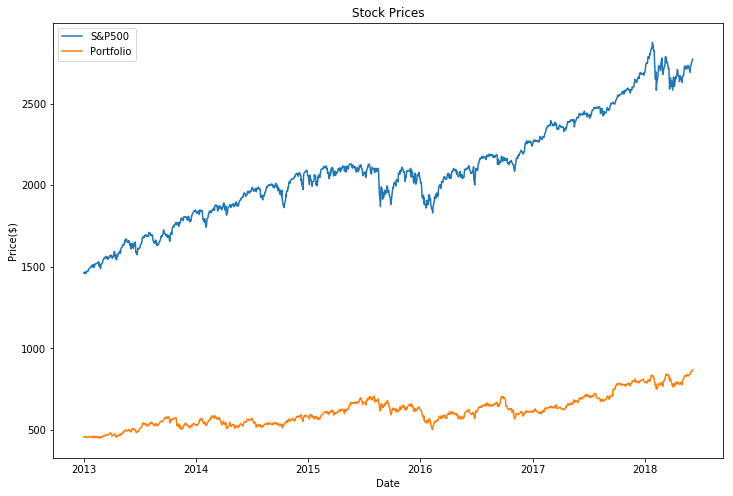

In [15]:
# Plotting dataframe
plt.figure(figsize=(12,8))
plt.plot(df)
plt.title('Stock Prices')
plt.xlabel('Date')
plt.ylabel('Price($)')
plt.legend(df.columns)
plt.show()

In [21]:
# Export dataframes to csv files
df.to_csv('data/StockPrices.csv', encoding='utf-8')